In [1]:
import sys
sys.path.append('D://isid_phm/src/')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from libs.load_data import make_train_test_data

In [3]:
train, test = make_train_test_data('D://isid_phm/data')

In [6]:
train.head()

,Altitude,Mach #,Flight Regime,Power Setting (TRA),T2 Total temperature at fan inlet ｰR,T24 Total temperature at LPC outlet ｰR,T30 Total temperature at HPC outlet ｰR,T50 Total temperature at LPT outlet ｰR,P2 Pressure at fan inlet psia,P15 Total pressure in bypass-duct psia,...,htBleed (Bleed Enthalpy),Nf_dmd Demanded fan speed rpm,PCNfR_dmd Demanded corrected fan speed rpm,W31 HPT coolant bleed lbm/s,W32 LPT coolant bleed lbm/s,is_train,duration,engine_dead,dead_duration,engine_no
0,34.998,0.8400,5,100,449.44,555.32,1358.6,1137.2,5.48,8.00,...,334,2223,100.00,14.73,8.8071,1,0,0,148,Train_Engine_001
1,41.998,0.8408,6,100,445.00,549.90,1353.2,1125.8,3.91,5.71,...,330,2212,100.00,10.41,6.2665,1,1,0,148,Train_Engine_001
2,24.999,0.6218,4,60,462.54,537.31,1256.8,1047.5,7.05,9.02,...,309,1915,84.93,14.08,8.6723,1,2,0,148,Train_Engine_001
3,42.008,0.8416,6,100,445.00,549.51,1354.0,1126.4,3.91,5.71,...,329,2212,100.00,10.59,6.4701,1,3,0,148,Train_Engine_001
4,25.000,0.6203,4,60,462.54,537.07,1257.7,1047.9,7.05,9.03,...,309,1915,84.93,14.13,8.5286,1,4,0,148,Train_Engine_001


In [18]:
train.corr()

,Altitude,Mach #,Flight Regime,Power Setting (TRA),T2 Total temperature at fan inlet ｰR,T24 Total temperature at LPC outlet ｰR,T30 Total temperature at HPC outlet ｰR,T50 Total temperature at LPT outlet ｰR,P2 Pressure at fan inlet psia,P15 Total pressure in bypass-duct psia,...,farB Burner fuel-air ratio --,htBleed (Bleed Enthalpy),Nf_dmd Demanded fan speed rpm,PCNfR_dmd Demanded corrected fan speed rpm,W31 HPT coolant bleed lbm/s,W32 LPT coolant bleed lbm/s,is_train,duration,engine_dead,dead_duration
Altitude,1.000000,0.943005,0.996944,-0.028488,-0.964414,-0.867452,-0.787862,-0.840737,-0.987344,-0.976459,...,-0.838749,-0.790552,-0.443924,-0.028488,-0.962036,-0.962058,NaN,0.000039,0.018619,0.001608
Mach #,0.943005,1.000000,0.918732,-0.065350,-0.884061,-0.808822,-0.759658,-0.836673,-0.932606,-0.928264,...,-0.888615,-0.762704,-0.438600,-0.065350,-0.920772,-0.920777,NaN,0.000750,0.005920,0.001091
Flight Regime,0.996944,0.918732,1.000000,-0.058785,-0.968774,-0.881242,-0.802991,-0.847741,-0.984297,-0.975496,...,-0.830902,-0.805365,-0.471293,-0.058785,-0.963363,-0.963385,NaN,0.000090,0.020161,0.001602
Power Setting (TRA),-0.028488,-0.065350,-0.058785,1.000000,0.164334,0.480073,0.620839,0.544563,0.113635,0.198092,...,0.295212,0.617185,0.902999,1.000000,0.276544,0.276480,NaN,-0.005057,0.016347,0.000964
T2 Total temperature at fan inlet ｰR,-0.964414,-0.884061,-0.968774,0.164334,1.000000,0.944089,0.870963,0.898003,0.986372,0.986424,...,0.793789,0.873265,0.572171,0.164334,0.977703,0.977718,NaN,-0.001011,-0.016434,-0.001416
T24 Total temperature at LPC outlet ｰR,-0.867452,-0.808822,-0.881242,0.480073,0.944089,1.000000,0.982225,0.981048,0.915808,0.944072,...,0.805280,0.983065,0.810312,0.480073,0.962425,0.962417,NaN,0.003753,-0.007578,-0.001610
T30 Total temperature at HPC outlet ｰR,-0.787862,-0.759658,-0.802991,0.620839,0.870963,0.982225,1.000000,0.989565,0.842951,0.884795,...,0.804821,0.998680,0.895446,0.620839,0.917144,0.917125,NaN,0.024638,0.003836,-0.003159
T50 Total temperature at LPT outlet ｰR,-0.840737,-0.836673,-0.847741,0.544563,0.898003,0.981048,0.989565,1.000000,0.884243,0.919684,...,0.859129,0.990213,0.843646,0.544563,0.946479,0.946470,NaN,0.037107,0.007743,-0.005300
P2 Pressure at fan inlet psia,-0.987344,-0.932606,-0.984297,0.113635,0.986372,0.915808,0.842951,0.884243,1.000000,0.996311,...,0.824095,0.845626,0.523827,0.113635,0.985714,0.985727,NaN,-0.000516,-0.017511,-0.001743
P15 Total pressure in bypass-duct psia,-0.976459,-0.928264,-0.975496,0.198092,0.986424,0.944072,0.884795,0.919684,0.996311,1.000000,...,0.840332,0.887137,0.594047,0.198092,0.996356,0.996363,NaN,-0.000691,-0.015586,-0.001626


In [7]:
test.head()

,Altitude,Mach #,Flight Regime,Power Setting (TRA),T2 Total temperature at fan inlet ｰR,T24 Total temperature at LPC outlet ｰR,T30 Total temperature at HPC outlet ｰR,T50 Total temperature at LPT outlet ｰR,P2 Pressure at fan inlet psia,P15 Total pressure in bypass-duct psia,...,htBleed (Bleed Enthalpy),Nf_dmd Demanded fan speed rpm,PCNfR_dmd Demanded corrected fan speed rpm,W31 HPT coolant bleed lbm/s,W32 LPT coolant bleed lbm/s,is_train,duration,engine_dead,dead_duration,engine_no
53759,10.005,0.250,2,100,489.05,604.28,1492.2,1311.5,10.52,15.49,...,368,2319,100.00,28.57,17.1490,0,0,0,57,Test_Engine_001
53760,42.007,0.840,6,100,445.00,549.46,1356.0,1125.9,3.91,5.71,...,330,2212,100.00,10.54,6.3519,0,1,0,57,Test_Engine_001
53761,25.000,0.620,4,60,462.54,536.78,1259.6,1044.7,7.05,9.02,...,307,1915,84.93,14.50,8.6095,0,2,0,57,Test_Engine_001
53762,20.006,0.701,3,100,491.19,607.22,1486.6,1257.1,9.35,13.66,...,364,2324,100.00,24.49,14.7480,0,3,0,57,Test_Engine_001
53763,42.005,0.840,6,100,445.00,550.36,1352.8,1131.2,3.91,5.72,...,330,2212,100.00,10.55,6.3496,0,4,0,57,Test_Engine_001


In [8]:
train.shape, test.shape

((53759, 30), (12817, 30))

In [9]:
train['engine_no'].nunique(), test['engine_no'].nunique()

(260, 100)

count    260.000000
mean     205.765385
std       46.782198
min      127.000000
25%      173.000000
50%      198.000000
75%      229.250000
max      377.000000
Name: duration, dtype: float64

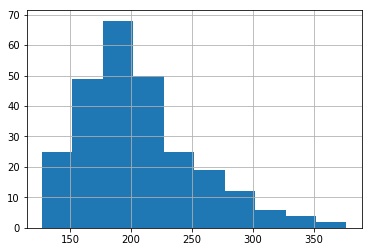

In [10]:
dead = train[train['engine_dead'] == 1]
dead['duration'].hist()
dead['duration'].describe()

count    100.000000
mean     127.170000
std       62.362423
min       20.000000
25%       77.000000
50%      124.500000
75%      163.250000
max      366.000000
Name: duration, dtype: float64

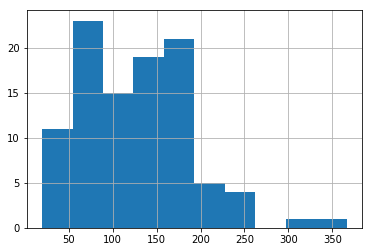

In [11]:
test_last_dur = test.groupby('engine_no')['duration'].max()
test_last_dur.hist()
test_last_dur.describe()

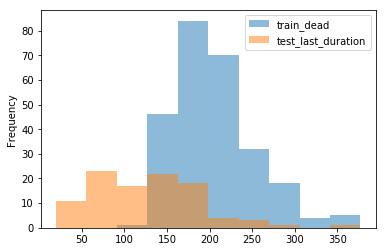

In [12]:
hist_df = pd.DataFrame({
    'train_dead': dead['duration'],
    'test_last_duration': test_last_dur
})
hist_df.plot.hist(alpha=0.5)

In [13]:
eg_i = np.random.choice(train['engine_no'].unique())
eg_df = train[train['engine_no'] == eg_i]

In [14]:
print(eg_i)
print('shape:', eg_df.shape)
eg_df['Flight Regime'].value_counts()

Train_Engine_118
shape: (344, 30)


6    84
1    56
3    55
4    53
2    50
5    46
Name: Flight Regime, dtype: int64

C:\Users\km70446\AppData\Local\Continuum\anaconda3\envs\kmtanalytics-dev\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


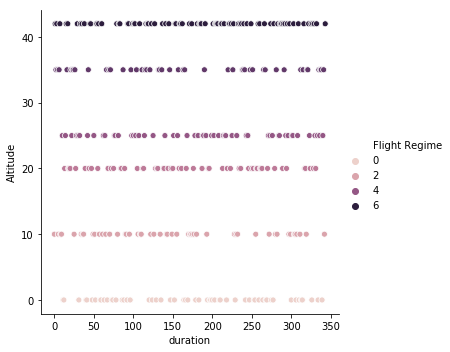

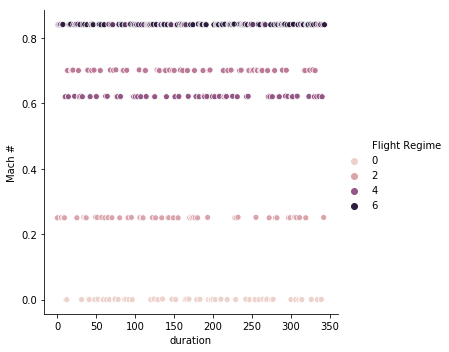

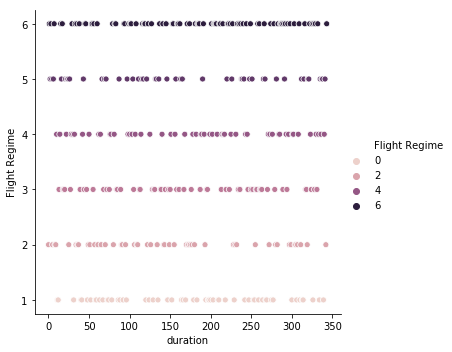

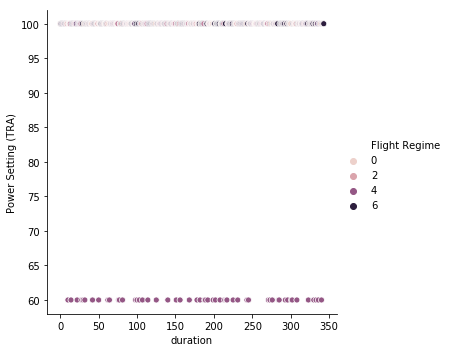

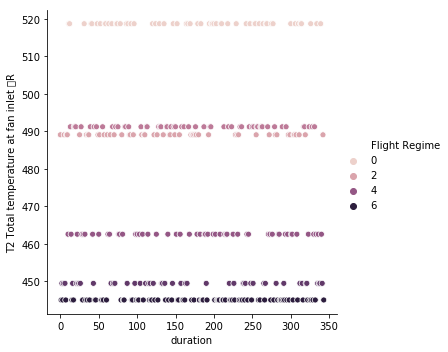

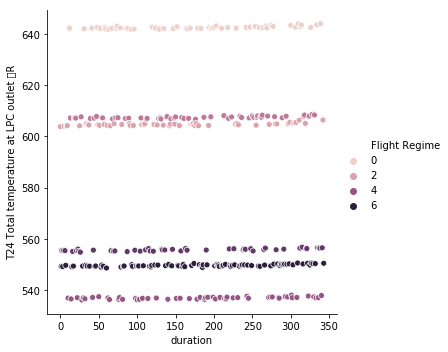

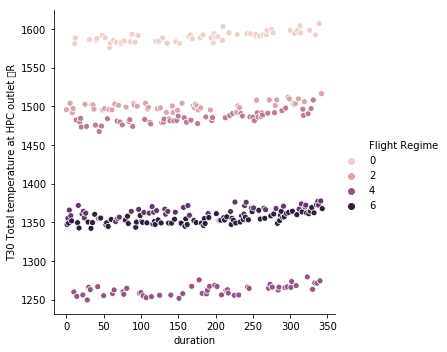

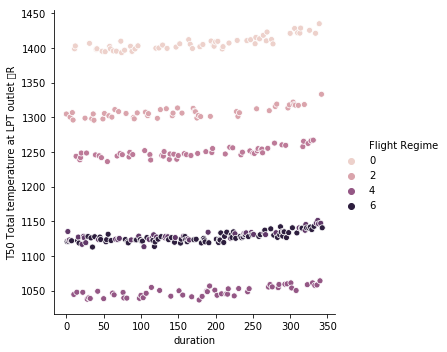

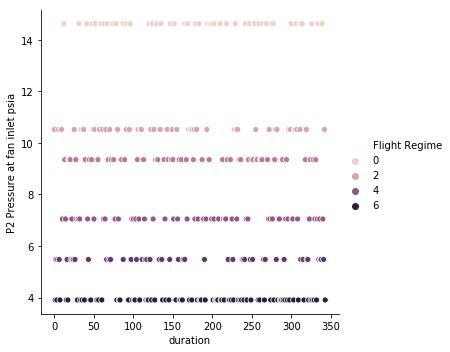

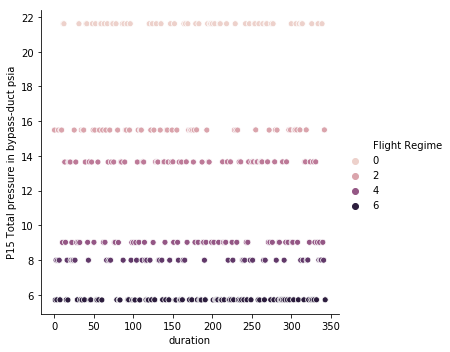

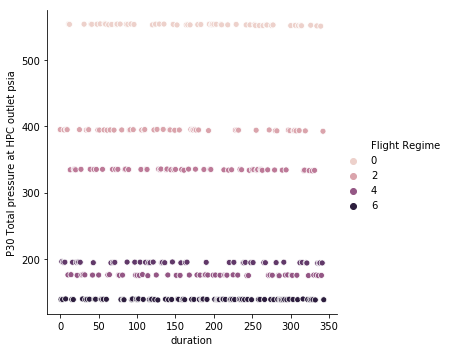

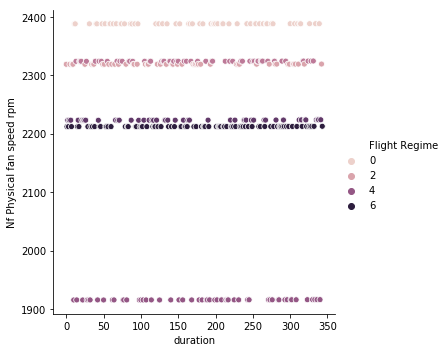

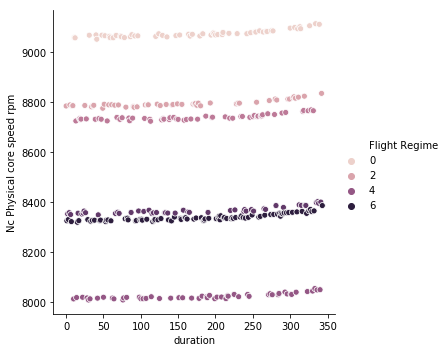

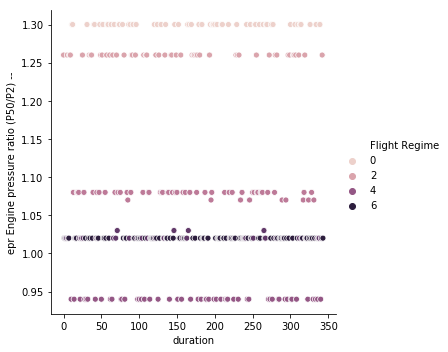

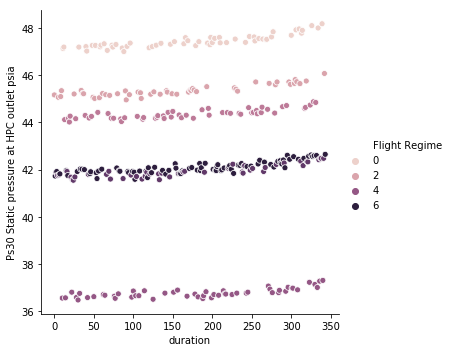

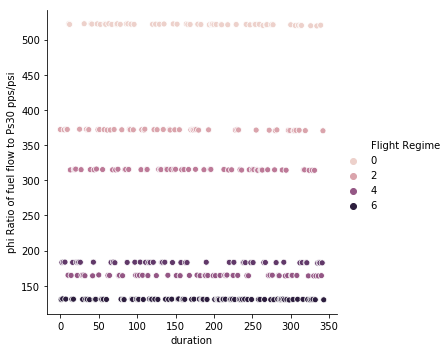

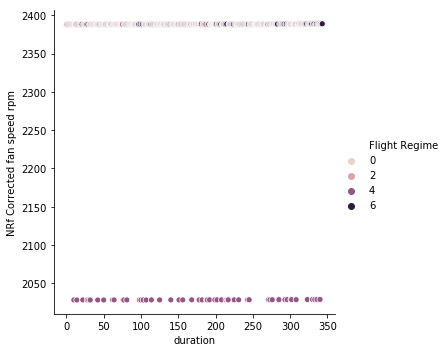

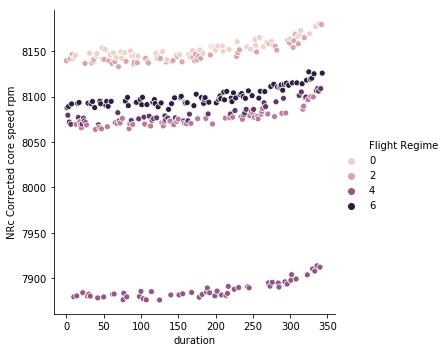

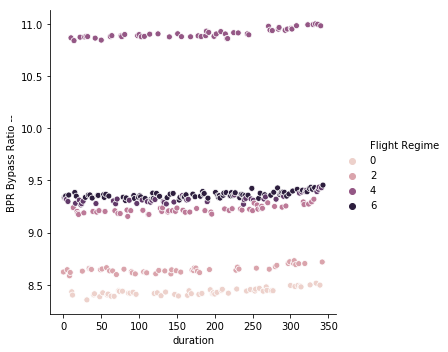

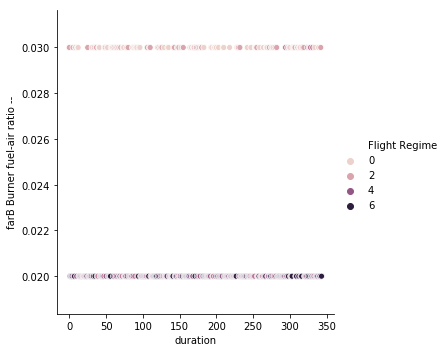

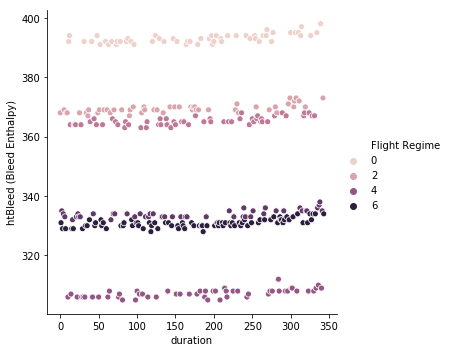

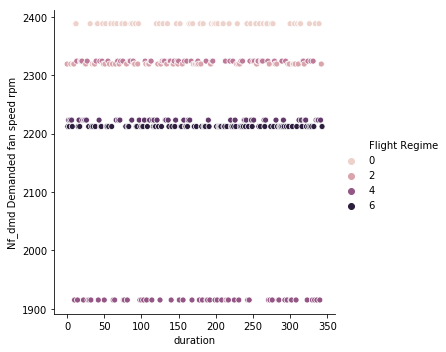

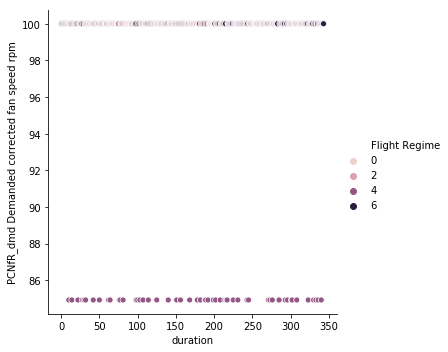

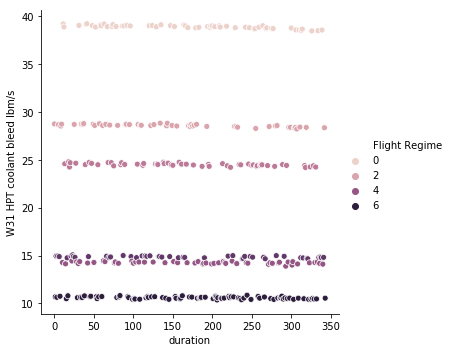

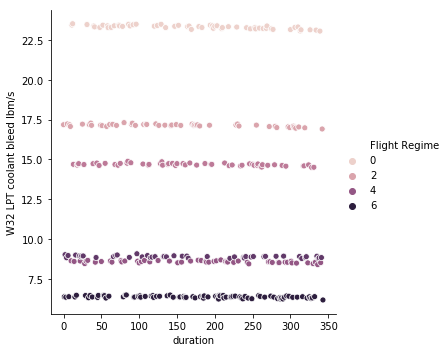

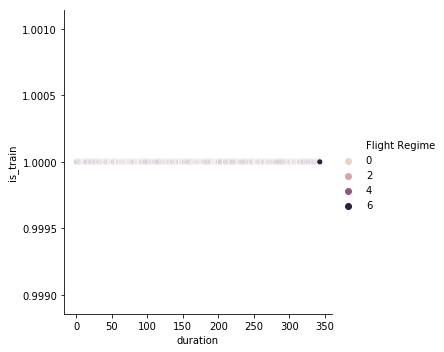

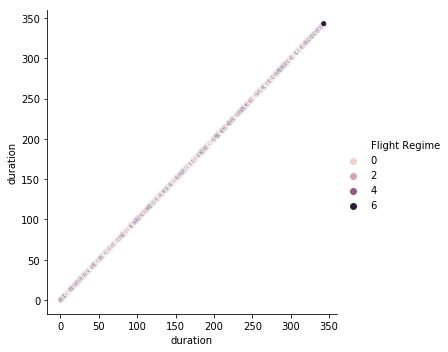

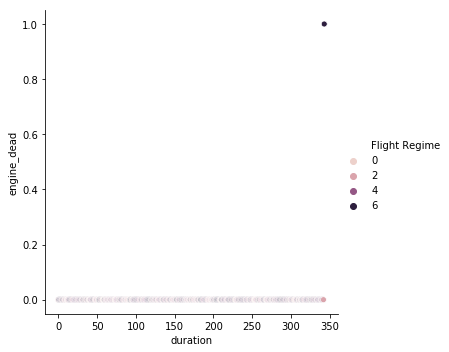

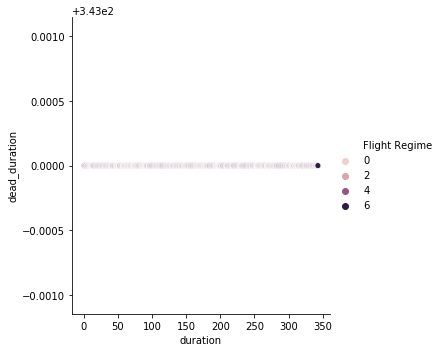

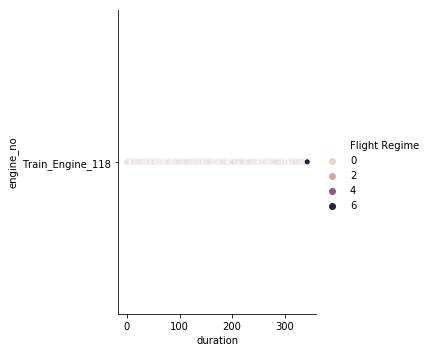

In [15]:
for col_i in eg_df.columns:
    sns.relplot(x='duration', y=col_i, hue='Flight Regime', data=eg_df)